# Estudo de Caso 1 - Funções de Ativação

Em muitos problemas de Ciência de Dados, nem sem sempre a entrada X tem uma relação linear com a saída Y. Por exemplo, o preço de um imóvel tem n variáveis que podem influenciar para mais ou menos o preço de uma casa. Com uma análise padrão, nem sempre conseguimos achar alguma resposta clara de como é a relação em X com Y e então usamos as chamadas funções de ativação. 

As funções de ativação são usadas em modelos com Deep Learning para introduzir a não linearidade na análise preditiva. Ou seja, em muitos problemas temos uma relação não linear entre as variáveis preditoras e a variável target. 

Algumas das funções de ativação mais comuns incluem a ReLU (unidade linear retificada), a sigmóide e a tangente hiperbólica. O objetivo desse script é demonstrar na prática quais as principais diferentes entre eles na performance do modelo.

## 1. Instalação e Carga de Pacotes

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da linguagem Python usada neste Jupyter Notebook:', python_version())

Versão da linguagem Python usada neste Jupyter Notebook: 3.9.16


In [ ]:
# Pytorch
!pip install -q torch==1.13.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.2/890.2 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 KB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.15.1+cu118 requires torch==2.0.0, but you have torch 1.13.0 which is incompatible.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 1.13.0 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.13.0 which is incompatible.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.13.0 which is incompatible.


In [ ]:
# Torchvision
!pip install -q torchvision==0.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 37.5 MB/s eta 0:00:00


In [ ]:
# Watermark
!pip install -q -U watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.8 MB/s eta 0:00:00


In [ ]:
# Carga dos Pacotes

# Verifica tempo de treinamento
import time

# Pacote torch
import torch
import torch.nn as nn # local das funções de ativação
import torch.optim as optim # otimização do modelo
import torch.nn.functional as F # camadas do modelo de Deep Learning

# Pacote Torchvision
import torchvision
from torchvision import datasets, transforms # Origem dos dados e aplicação de transformação aos dados

# Pacotes para análises de dados
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [ ]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Estudo de Caso 1 - Funções de Ativação" --iversions

Author: Estudo de Caso 1 - Funções de Ativação

torchvision: 0.14.0
matplotlib : 3.7.1
numpy      : 1.22.4
torch      : 1.13.0



## 2. Carga dos Dados

In [ ]:
# Definição da função Transformer para carga dos dados
# Função transforma os dados em tensor e aplica normalização
transformacoes = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [ ]:
# Carga dos dados de treino
dados_treino = torch.utils.data.DataLoader(datasets.MNIST('dados',
                                                         train = True,
                                                         download = True,
                                                         transform = transformacoes),
                                                         batch_size = 64, # tamanho do lote de imagens
                                                         shuffle = True) # ordem aleatória das imagens

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting dados/MNIST/raw/train-images-idx3-ubyte.gz to dados/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting dados/MNIST/raw/train-labels-idx1-ubyte.gz to dados/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting dados/MNIST/raw/t10k-images-idx3-ubyte.gz to dados/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting dados/MNIST/raw/t10k-labels-idx1-ubyte.gz to dados/MNIST/raw



In [ ]:
# Carga dos dados de teste
dados_teste = torch.utils.data.DataLoader(datasets.MNIST('dados',
                                                        train = False,
                                                        transform = transformacoes),
                                                        batch_size = 64,
                                                        shuffle = True)

In [ ]:
# Visualização a dimensão dos dados de treino
# São 64 imagens em cada lote com dimensão 28x28 pixels.
dataiter = iter(dados_treino)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


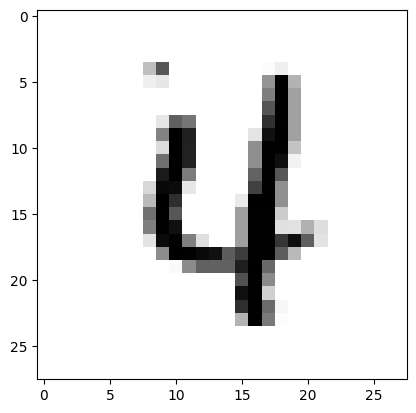

In [ ]:
# Visualizando uma imagem
plt.imshow(images[0].numpy().squeeze(), cmap = 'gray_r');

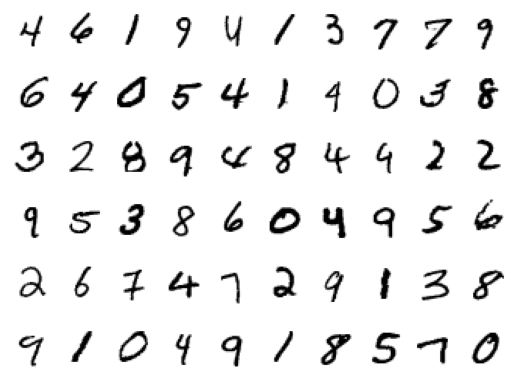

In [ ]:
# Visualizando várias imagens
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap = 'gray_r')

## 3. Definição dos Hiperparâmetros

In [ ]:
# Hiperparâmetros da rede

input_size = 784 # entrada do modelo
hidden_sizes = [128, 64] # camadas da matriz
output_size = 10 #saída do modelo

## 4. Função de Ativação ReLU

Em resumo, a função ReLU transforma valores negativos em 0 e mantém os valores positivos. Contudo, o tempo de treinamento tende a ser maior.

In [ ]:
# Modelo com função de ativação ReLu
modelo_fa = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),  # 784 x 128
                          nn.ReLU(),
                          nn.Linear(hidden_sizes[0], hidden_sizes[1]),  # 128 x 64
                          nn.ReLU(),
                          nn.Linear(hidden_sizes[1], output_size),  # 64 x 10
                          nn.LogSoftmax(dim = 1))

## 5. Função de Ativação LeakyReLU
Em resumo, a função LeakyReLU tem o mesmo princípio da ReLU com a diferença de que os valores negativos não são zerados, mas sim aproximados a 0. Isso garante um treinamento mais rápido que a ReLU, mas nem sempre significa uma maior acurácia do modelo.

In [ ]:
# Modelo da função de ativação LeakyReLU
# modelo_fa = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]), # 784 x 128
                          # nn.LeakyReLU(0.2),
                          # nn.Linear(hidden_sizes[0], hidden_sizes[1]), # 128 x 64
                          # nn.LeakyReLU(0.2),
                          #nn.Linear(hidden_sizes[0], hidden_sizes[1]), # 64 x 10
                          #nn.LogSoftmax(dim = 1))

## 6. Função de Ativação Sigmoid
A Sigmoid é uma das funções mais antigas em Deep Learning. Possui resultado entre 0 e 1 com a reta em forma de s que não passa pela origem. Por ser uma das funções mais antigas, apresenta uma performance pior quando é usada com problemas mais complexos com muitas camadas. Outro ponto é que leva ao Gradient Vanishing, ou seja, o gradiente fica próximo de 0 levando a imprecisão do modelo.

In [ ]:
# Modelo da função de ativação Sigmoid
# modelo_fa = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]), # 784 x 128
                          # nn.Sigmoid(),
                          # nn.Linear(hidden_sizes[0], hidden_sizes[1]), # 128 x 64
                          # nn.Sigmoid(),
                          # nn.Linear(hidden_sizes[0], hidden_sizes[1]), # 64 x 10
                          # nn.LogSoftmax(dim = 1))

## 7. Função de Ativação Tahn

Muito parecida com a função Sigmoid, mas entre valores de -1 e +1, sendo que o problema com o Gradient Vanishing persiste.

In [ ]:
# Modelo com função de ativação Tanh
#modelo_fa = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),  # 784 x 128
#                          nn.Tanh(),
#                          nn.Linear(hidden_sizes[0], hidden_sizes[1]),  # 128 x 64
#                          nn.Tanh(),
#                          nn.Linear(hidden_sizes[1], output_size),  # 64 x 10
#                          nn.LogSoftmax(dim = 1))

In [ ]:
# Visualiza o modelo utilizado
print(modelo_fa)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


## 8. Modelo de Rede Neural
###  8.1 Definições do modelo

In [ ]:
# Função de custo do modelo
criterion = nn.NLLLoss()

In [ ]:
# Obtendo os lotes de dados
images, labels = next(iter(dados_treino))

In [ ]:
# Ajustando o shape
images = images.view(images.shape[0], -1)

In [ ]:
# Logs das probabilidades de classe
logps = modelo_fa(images)

In [ ]:
# Perda
loss = criterion(logps, labels)

In [ ]:
print('\nAntes do Backward Pass: \n', modelo_fa[0].weight.grad)
loss.backward()
print('\nDepois do Backward Pass: \n', modelo_fa[0].weight.grad)


Antes do Backward Pass: 
 None

Depois do Backward Pass: 
 tensor([[ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        [ 0.0026,  0.0026,  0.0026,  ...,  0.0026,  0.0026,  0.0026],
        ...,
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [-0.0030, -0.0030, -0.0030,  ..., -0.0030, -0.0030, -0.0030],
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007]])


### 8.2 Treinamento do modelo

In [ ]:
# Otimizador
optimizer = optim.SGD(modelo_fa.parameters(), lr = 0.003, momentum = 0.9)

# Número de épocas
epochs = 5

# Loop de treinamento
for e in range(epochs):
    
    # Registra o momento de início da época
    start_time = time.time()
    
    # Zera o erro da época
    running_loss = 0
    
    # Loop pelas imagens e labels
    for images, labels in dados_treino:
        
        # Flatten das imagens 
        images = images.view(images.shape[0], -1)
    
        # Zera os gradientes
        optimizer.zero_grad()
        
        # Previsão com o modelo
        output = modelo_fa(images)
        
        # Cálculo do erro
        loss = criterion(output, labels)
        
        # Aqui acontece o aprendizado com backpropagation
        loss.backward()
        
        # E aqui otimiza os pesos
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print('Epoch: {0}, Tempo Decorrido: {1:.2f}s, Loss(Erro): {2}'.format(e, 
                                                                          time.time() - start_time, 
                                                                          running_loss / len(dados_treino)))

Epoch: 0, Tempo Decorrido: 20.25s, Loss(Erro): 0.6536815500716919
Epoch: 1, Tempo Decorrido: 14.45s, Loss(Erro): 0.2811933786971673
Epoch: 2, Tempo Decorrido: 14.74s, Loss(Erro): 0.2195301042444734
Epoch: 3, Tempo Decorrido: 15.14s, Loss(Erro): 0.17767248990566237
Epoch: 4, Tempo Decorrido: 15.46s, Loss(Erro): 0.14983027888291173


### 8.3 Avaliação e teste do modelo

In [ ]:
# Função para visualizar a classificação
def visualiza_classe(img, ps):
    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize = (6,9), ncols = 2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Probabilidade de Classe')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Dígito Previsto = 6


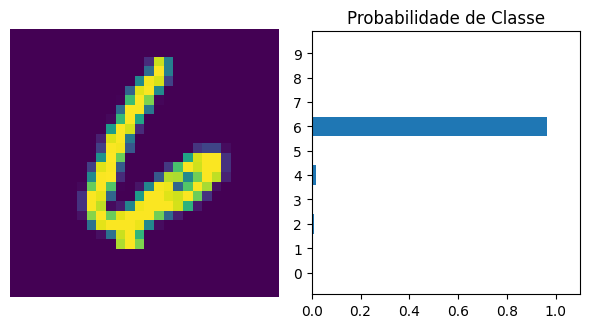

In [ ]:
# Obtém uma imagem de teste
images, labels = next(iter(dados_teste))

# Ajusta a imagem
img = images[0].view(1, 784)

# Faz previsão com a imagem
with torch.no_grad():
    logps = modelo_fa(img)

# Log de probabilidade da previsão
ps = torch.exp(logps)
probab = list(ps.numpy()[0])

# Print
print("Dígito Previsto =", probab.index(max(probab)))

# Visualiza classe
visualiza_classe(img.view(1, 28, 28), ps)

In [ ]:
# Avaliando o modelo

# Contadores
correct_count, all_count = 0, 0

# Loop
for images,labels in dados_teste:
    for i in range(len(labels)):
        
        img = images[i].view(1, 784)
        
        with torch.no_grad():
            logps = modelo_fa(img)

        ps = torch.exp(logps)
        
        probab = list(ps.numpy()[0])
        
        pred_label = probab.index(max(probab))
        
        true_label = labels.numpy()[i]
        
        if(true_label == pred_label):
            correct_count += 1
        
        all_count += 1

print("Número de Imagens Testadas =", all_count)
print("Acurácia nos Dados de Teste (%) =", (correct_count/all_count) * 100)

Número de Imagens Testadas = 10000
Acurácia nos Dados de Teste (%) = 95.88


## 9. Conclusão

In [ ]:
# Resultado da avaliação dos modelos (pode ser ligeiramente diferente a cada execução)

# ReLU - Acc de 96.05%
# LeakyReLU - Acc de 95.40%
# Sigmoid - Acc de 88.51%
# Tanh - Acc de 95.52%

Dentre as funções de ativação avaliadas neste script, a ReLU apresentou a melhor acurácia. Mesmo com os seus pontos negativos, ela se mostrou a mais eficientes dentre as demais.